# Music Genre Classification

##Library Import

In [1]:
!pip install pydub
!pip install foof

ERROR: Could not find a version that satisfies the requirement foof (from versions: none)
ERROR: No matching distribution found for foof


In [2]:
from operator import imod
import numpy as np
from sklearn.cluster import KMeans
!pip install --upgrade tsmoothie
from collections import Counter
!pip install fooof
# Import the FOOOF object
from fooof import FOOOF
from fooof import plts
# Import simulation functions to create some example data
from fooof.sim.gen import gen_power_spectrum
from fooof.plts.periodic import plot_peak_fits
from fooof.plts.spectra import plot_spectrum, plot_spectra
from fooof.plts.spectra import plot_spectrum_shading, plot_spectra_shading
from fooof.plts.periodic import plot_peak_fits, plot_peak_params
from fooof.plts.aperiodic import plot_aperiodic_params, plot_aperiodic_fits
from fooof.bands import Bands
from fooof.analysis import get_band_peak_fg
import pywt
import pickle
import joblib
import librosa.display as lplt
import pandas as pd
seed = 12
from tensorflow.keras import layers
import statistics
import seaborn as sns
import tensorflow as tf
from sklearn.decomposition import PCA
import keras as k
import librosa.display as lplt
# tf.random.set_seed(seed)
import matplotlib.pyplot as plt
import IPython
from pydub import AudioSegment
from sklearn.model_selection import train_test_split as tts
# import tensorflow.keras as keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import plotly.express as px
import plotly.graph_objects as go
import json
import os
import math
import librosa
from torch import nn, optim, as_tensor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch.optim import lr_scheduler
from sklearn.preprocessing import LabelEncoder
from torch.nn.init import *
from sklearn.model_selection import train_test_split
from torchvision import transforms, utils, datasets, models
import cv2
from PIL import Image
from pdb import set_trace
import time
import copy
from pathlib import Path
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage import io, transform
from tqdm import trange, tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import csv
import glob
import dlib
import numpy as np
import tensorflow as tf

     |████████████████████████████████| 112 kB 25.6 MB/s 



##Dataset Preparation and Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class Preprocess():
  def __init__(self,folder):
    self.col = ['chroma_stft', 'rms', 'spectral_centroid','spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate','harmon', 'plp', 'tempo','mfcc','label']
    self.dataframe = {}
    self.path = folder
    self.dfcol = ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
        'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
        'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
        'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
        'harmony_mean', 'harmony_var', 'plp_mean', 'plp_var', 'tempo','mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
        'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
        'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
        'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
        'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
        'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
        'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
        'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']
    for i in self.col:
      self.dataframe[i] = []
  
  def extract_features(self):
    for genre in os.listdir(self.path):
      genre_path = self.path +'/'+genre
      for song in os.listdir(genre_path):
        song_path  = genre_path +'/'+ song 
        for i in range(0,30,3):
          t1 = i * 1000 #Works in milliseconds
          t2 = (i+3) * 1000
          newAudio = AudioSegment.from_wav(song_path)
          newAudio = newAudio[t1:t2]
          newAudio.export('newSong.wav', format="wav") #Exports to a wav file in the current path.
          signal, sample_rate = librosa.load('newSong.wav', sr=7000,duration = 3)
          # signal, sample_rate = librosa.load(song_path, sr=5000,duration = 30)
          chroma = librosa.feature.chroma_stft(signal, sr=sample_rate)
          sp_roff = librosa.feature.spectral_rolloff(signal, sr=sample_rate)
          sp_cen = librosa.feature.spectral_centroid(signal, sr=sample_rate)
          sp_bw = librosa.feature.spectral_bandwidth(signal, sr=sample_rate)
          zcr = librosa.feature.zero_crossing_rate(signal)
          rms = librosa.feature.rms(signal)
          mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate)
          hrm = librosa.effects.harmonic(signal)
          tmp = librosa.beat.tempo(signal,sr = sample_rate)
          plp = librosa.beat.plp(signal,sr = sample_rate)
          self.dataframe['chroma_stft'].append(chroma)
          self.dataframe['rms'].append(rms)
          self.dataframe['spectral_centroid'].append(sp_cen)
          self.dataframe['spectral_bandwidth'].append(sp_bw)
          self.dataframe['spectral_rolloff'].append(sp_roff)
          self.dataframe['zero_crossing_rate'].append(zcr)
          self.dataframe['harmon'].append(hrm)
          self.dataframe['plp'].append(plp) 
          self.dataframe['tempo'].append(tmp)
          self.dataframe['mfcc'].append(mfcc)
          self.dataframe['label'].append(song[:-10])
    return

  def dict_extract_to_df(self):
    col = ['chroma_stft', 'rms', 'spectral_centroid','spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate','harmon', 'plp']
    X = []
    for i in col:
      mean = []
      var = []
      for j in self.dataframe[i]:
        mean.append(np.mean(j))
        var.append(np.var(j)) 
      X.append(mean)
      X.append(var)
    l = []
    for i in self.dataframe['tempo']:
      l.append(i[0])
    X.append(l)
    X = np.array(X)
    mfc = []
    for m in range(0,20):
      mean = []
      var = []
      for i in self.dataframe['mfcc']:
          var.append(np.var(i[m]))
          mean.append(np.mean(i[m]))
      mfc.append(mean)
      mfc.append(var)
    mfc = np.array(mfc)
    X = np.concatenate([X.T,mfc.T],axis = 1)
    df = pd.DataFrame(X,columns = self.dfcol)
    label = pd.DataFrame(self.dataframe['label'],columns=['label'])
    df = pd.concat((df,label),axis=1)
    return df
  
  def fit(self,X,y=None):
    return self
  
  def transform(self,X):
    self.extract_features()
    df = self.dict_extract_to_df()
    return df

In [ ]:
pre = Preprocess('drive/MyDrive/Project/Data/genres_original')
pre.fit('drive/MyDrive/Project/Data/genres_original')
df1 = pre.transform('drive/MyDrive/Project/Data/genres_original')
df1.head()

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning:

Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning:

n_fft=384 is too small for input signal of length=42

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning:

n_fft=384 is too small for input signal of length=41

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning:

Trying to estimate tuning from empty frequency set.



,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.397767,0.101636,0.275646,0.005796,779.694363,83979.142304,861.409070,29245.859828,1786.621094,518883.307775,...,87.618317,-3.500830,67.546074,4.447223,79.145317,-6.585313,59.142189,-3.014749,71.376129,pop
1,0.412501,0.087386,0.241581,0.006440,860.569221,107981.939967,923.564449,30625.190364,1987.711589,446131.262514,...,277.037933,-4.134578,74.109901,5.670750,67.420341,-4.373206,60.240986,-0.477733,50.120342,pop
2,0.360819,0.091854,0.274457,0.006080,816.633745,76510.988837,881.728278,14670.989891,1855.875651,365318.490399,...,72.996689,-9.265010,57.479073,2.361090,31.148720,-8.027550,26.617788,-2.249001,50.866779,pop
3,0.374949,0.091862,0.275231,0.007280,833.138530,85404.280281,897.741389,18524.349441,1916.178385,353281.312519,...,21.749897,-9.122002,25.957026,4.271899,42.725300,-7.879617,34.641644,-1.147515,53.756493,pop
4,0.353357,0.091257,0.246807,0.005945,917.376173,79390.350410,921.715982,13819.246926,2092.692057,251410.437955,...,63.357246,-9.142367,64.949348,0.798233,76.263428,-7.307360,45.406979,1.127086,85.470886,pop


In [ ]:
class genre_classifier():
  def __init__(self,path,scaler,model):
    self.path = path
    self.model = model
    self.df = None
    self.scaler = scaler
    self.col = ['chroma_stft', 'rms', 'spectral_centroid','spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate','harmon', 'plp', 'tempo','mfcc']
    self.dataframe = {}
    self.dfcol = ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
        'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
        'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
        'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
        'harmony_mean', 'harmony_var', 'plp_mean', 'plp_var', 'tempo','mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
        'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
        'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
        'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
        'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
        'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
        'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
        'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']
    for i in self.col:
      self.dataframe[i] = []
  
  def load_file(self):
    audio = AudioSegment.from_wav(self.path)
    sec = audio.duration_seconds
    if(sec>=30):
      t1 = 0 * 1000 #Works in milliseconds
      t2 = (30) * 1000
      audio = audio[t1:t2]
      audio.export(self.path, format="wav")
    for i in range(0,30,3):
      t1 = i * 1000 #Works in milliseconds
      t2 = (i+3) * 1000
      newAudio = AudioSegment.from_wav(self.path)
      newAudio = newAudio[t1:t2]
      newAudio.export('newSong.wav', format="wav") #Exports to a wav file in the current path.
      signal, sample_rate = librosa.load('newSong.wav', sr=7000,duration = 3)
      # signal, sample_rate = librosa.load(song_path, sr=5000,duration = 30)
      chroma = librosa.feature.chroma_stft(signal, sr=sample_rate)
      sp_roff = librosa.feature.spectral_rolloff(signal, sr=sample_rate)
      sp_cen = librosa.feature.spectral_centroid(signal, sr=sample_rate)
      sp_bw = librosa.feature.spectral_bandwidth(signal, sr=sample_rate)
      zcr = librosa.feature.zero_crossing_rate(signal)
      rms = librosa.feature.rms(signal)
      mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate)
      hrm = librosa.effects.harmonic(signal)
      tmp = librosa.beat.tempo(signal,sr = sample_rate)
      plp = librosa.beat.plp(signal,sr = sample_rate)
      self.dataframe['chroma_stft'].append(chroma)
      self.dataframe['rms'].append(rms)
      self.dataframe['spectral_centroid'].append(sp_cen)
      self.dataframe['spectral_bandwidth'].append(sp_bw)
      self.dataframe['spectral_rolloff'].append(sp_roff)
      self.dataframe['zero_crossing_rate'].append(zcr)
      self.dataframe['harmon'].append(hrm)
      self.dataframe['plp'].append(plp) 
      self.dataframe['tempo'].append(tmp)
      self.dataframe['mfcc'].append(mfcc)
    
  def dict_extract_to_df(self):
    col = ['chroma_stft', 'rms', 'spectral_centroid','spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate','harmon', 'plp']
    X = []
    for i in col:
      mean = []
      var = []
      for j in self.dataframe[i]:
        mean.append(np.mean(j))
        var.append(np.var(j)) 
      X.append(mean)
      X.append(var)
    l = []
    for i in self.dataframe['tempo']:
      l.append(i[0])
    X.append(l)
    X = np.array(X)
    mfc = []
    for m in range(0,20):
      mean = []
      var = []
      for i in self.dataframe['mfcc']:
          var.append(np.var(i[m]))
          mean.append(np.mean(i[m]))
      mfc.append(mean)
      mfc.append(var)
    mfc = np.array(mfc)
    X = np.concatenate([X.T,mfc.T],axis = 1)
    df = pd.DataFrame(X,columns = self.dfcol)
    return df

  def predict(self):
    self.load_file()
    df = self.dict_extract_to_df()
    self.df = df
    y_pred = self.model.predict(self.scaler.transform(df))
    print(y_pred)
    # y_labels = []
    # y_probs = []
    # for i in y_pred:
    #     y_labels.append(np.argmax(i))
    #     y_probs.append(max(i))
    # # print(y_probs)
    # index = np.argmax(y_probs)
    return statistics.mode(y_pred)

In [ ]:
gc.dataframe

{'chroma_stft': [],
 'harmon': [],
 'mfcc': [],
 'plp': [],
 'rms': [],
 'spectral_bandwidth': [],
 'spectral_centroid': [],
 'spectral_rolloff': [],
 'tempo': [],
 'zero_crossing_rate': []}

In [ ]:
def extract_features(song_path):
  columns = ['chroma_stft', 'rms', 'spectral_centroid','spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate','harmon', 'plp', 'tempo','mfcc','label']
  dataframe = {}
  for i in columns :
    dataframe[i] = []
  dataframes = []
  for i in range(10):
    dataframes.append(dataframe)
  df = []
  j = 0
  for i in range(0,30,3):
    t1 = i * 1000 #Works in milliseconds
    t2 = (i+3) * 1000
    newAudio = AudioSegment.from_wav(song_path)
    newAudio = newAudio[t1:t2]
    newAudio.export('newSong.wav', format="wav") #Exports to a wav file in the current path.
    signal, sample_rate = librosa.load('newSong.wav', sr=5000,duration = 3)
    # signal, sample_rate = librosa.load(song_path, sr=5000,duration = 30)
    chroma = librosa.feature.chroma_stft(signal, sr=sample_rate)
    sp_roff = librosa.feature.spectral_rolloff(signal, sr=sample_rate)
    sp_cen = librosa.feature.spectral_centroid(signal, sr=sample_rate)
    sp_bw = librosa.feature.spectral_bandwidth(signal, sr=sample_rate)
    zcr = librosa.feature.zero_crossing_rate(signal)
    rms = librosa.feature.rms(signal)
    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate)
    hrm = librosa.effects.harmonic(signal)
    tmp = librosa.beat.tempo(signal,sr = sample_rate)
    plp = librosa.beat.plp(signal,sr = sample_rate)
    dataframes[j]['chroma_stft'].append(chroma)
    dataframes[j]['rms'].append(rms)
    dataframes[j]['spectral_centroid'].append(sp_cen)
    dataframes[j]['spectral_bandwidth'].append(sp_bw)
    dataframes[j]['spectral_rolloff'].append(sp_roff)
    dataframes[j]['zero_crossing_rate'].append(zcr)
    dataframes[j]['harmon'].append(hrm)
    dataframes[j]['plp'].append(plp) 
    dataframes[j]['tempo'].append(tmp)
    dataframes[j]['mfcc'].append(mfcc)
    dataframes[j]['label'].append(song[:-10])
    j = j + 1
    df.append(dict_extract_to_df(dataframes[j]))
  return pd.concat(df,axis=0)

In [ ]:
df.to_csv('keepsafe.csv')

In [4]:
df=pd.read_csv('drive/MyDrive/Project/Data/keepsafe.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.424498,0.096433,0.278889,0.003143,536.776652,24172.541935,585.161358,9871.517670,1179.199219,168937.047323,...,39.440720,-13.299069,68.328156,-5.111133,69.307526,-3.200319,86.164581,6.131075,96.389374,pop
1,0.454941,0.088384,0.247186,0.002870,558.651856,16428.453923,637.129748,6904.123578,1330.973307,143268.538846,...,69.230927,-12.240749,72.816078,-1.460049,20.262718,-12.376425,64.268417,-1.168651,43.996151,pop
2,0.388359,0.096212,0.278185,0.003561,549.629170,22976.451513,571.499480,5350.117349,1142.008464,93057.427141,...,20.576262,-14.692633,46.347664,2.151138,95.630493,-5.496978,101.254486,3.294393,101.231407,pop
3,0.382329,0.091713,0.278243,0.003484,560.933439,20645.610149,609.681167,6314.199958,1275.634766,116063.654423,...,25.224039,-13.231953,65.217308,0.755171,54.833794,-5.025728,78.406418,3.648182,61.363106,pop
4,0.380796,0.094767,0.250799,0.002924,613.146716,18909.838408,625.671716,2610.513743,1336.425781,89579.661687,...,46.594692,-10.371449,113.958618,-0.995978,71.339851,-4.411731,156.053879,5.969636,67.296768,pop


In [ ]:
pca = PCA(n_components=2)
scaler_ = StandardScaler()
df_s = scaler_.fit_transform(df.iloc[:,:-1])
X_pca = pd.DataFrame(pca.fit_transform(df_s),columns=['PCA1','PCA2'])
df_pca = pd.concat([X_pca,df.iloc[:,-1]],axis=1)
df_pca.head()

,PCA1,PCA2,label
0,3.443167,2.660548,pop
1,0.902216,2.426331,pop
2,1.816771,2.106956,pop
3,0.973635,1.756823,pop
4,2.079479,0.094396,pop


###Spectral Analysis

In [ ]:
path = 'drive/MyDrive/Project/Data/genres_original'
spectral_dataframe = []
for genre in os.listdir(path):
      genre_path = path +'/'+genre
      for song in os.listdir(genre_path):
        song_path  = genre_path +'/'+ song 
        for i in range(0,30,3):
          t1 = 0 * 1000 #Works in milliseconds
          t2 = (30) * 1000
          audio = AudioSegment.from_wav(path)
          sec = audio.duration_seconds
          if(sec>=30):
            t1 = 0 * 1000 #Works in milliseconds
            t2 = (30) * 1000
            audio = audio[t1:t2]
            audio.export(path, format="wav")
          for i in range(0,30,3):
            t1 = i * 1000 #Works in milliseconds
            t2 = (i+3) * 1000
            newAudio = AudioSegment.from_wav(path)
            newAudio = newAudio[t1:t2]
            newAudio.export('newSong.wav', format="wav")
            sample_rate, samples = wav.read(path)
            f, t, Zxx = signal.stft(samples, fs=1)
            sp = Zxx
            F = 1/5
            n = len(samples)
            l = int((n)/2)
            if l%2 == 0:
              spp = sp[0:l+2]
            else:
              spp = sp[0:l+1]
            ps = [(1/(F*n))*abs(x)**2 for x in spp]
            sps=[2*x for x in ps]
            i = 0
            ff = []
            while i<=F/2:
              ff.append(i)
              i+=F/n
            sps = sps[0:len(ff)]
            sps = np.array(sps)
            ff = np.array(ff)
            T = sps.T
            aperiodic_comp = []
            periodic_comp = []
            for i in range(0,len(T)):    
              fm = FOOOF(verbose=False)
              fm.fit(f,T[i])
              aperiodic_comp.append(fm.get_params('aperiodic_params'))
              periodic_comp.append(fm._peak_fit)
            ap1 = aperiodic_comp
            p1 = periodic_comp
            spectral_dataframe.append(np.mean(np.array(ap1)[:,0]))
            spectral_dataframe.append(np.mean(np.array(ap1)[:,1]))
            spectral_dataframe.append(np.var(np.array(ap1)[:,0]))
            spectral_dataframe.append(np.var(np.array(ap1)[:,1]))
            spectral_dataframe.append(np.mean(np.array(p1)))
            spectral_dataframe.append(np.mean(np.array(p1)))
            

## Loading Given CSV File

In [ ]:
path = 'drive/MyDrive/Project/Data/features_3_sec.csv'
df2=pd.read_csv(path)
label = LabelEncoder()
df2=df2.drop(['length','filename'],axis=1)
df2['label']=label.fit_transform(df2['label'])
df2.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,0
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,0
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,0
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,0
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,0


In [ ]:
X_train2,X_test2,y_train2,y_test2=tts(df2.iloc[:,:-1],df2.iloc[:,-1],test_size=0.2)
scaler2 = StandardScaler()
X_train2 = pd.DataFrame(scaler2.fit_transform(X_train2), columns=X_train2.columns)
X_test2 = pd.DataFrame(scaler2.transform(X_test2), columns=X_train2.columns)

##Dataset Visualization

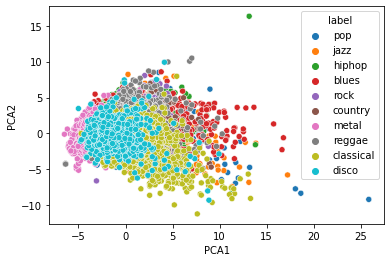

In [ ]:
sns.scatterplot(data = df_pca, x="PCA1", y='PCA2', hue="label")

In [ ]:
fig = px.scatter(df_pca, x="PCA1", y="PCA2", color="label")
fig.show()

In [ ]:
fig = px.bar(df.iloc[:,-1])
fig.show()

In [ ]:
# labels = df.iloc[:,:-1]
# for i in list(df.columns)[:-1]:
#   fig = px.box(x = labels, y = df[i],title = i)
#   fig.show()

In [ ]:
song = 'drive/MyDrive/Project/Data/genres_original/classical/classical.00098.wav'
audio_data, sr = librosa.load(song)
audio_data, _ = librosa.effects.trim(audio_data)
IPython.display.Audio(audio_data, rate=sr)

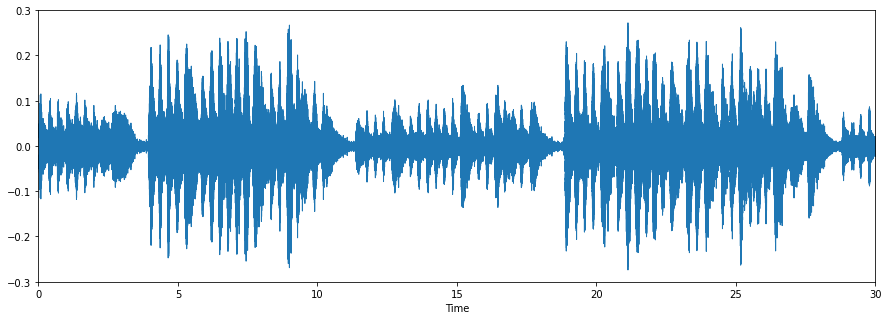

In [ ]:
plt.figure(figsize=(15,5))
lplt.waveplot(audio_data)
plt.show()

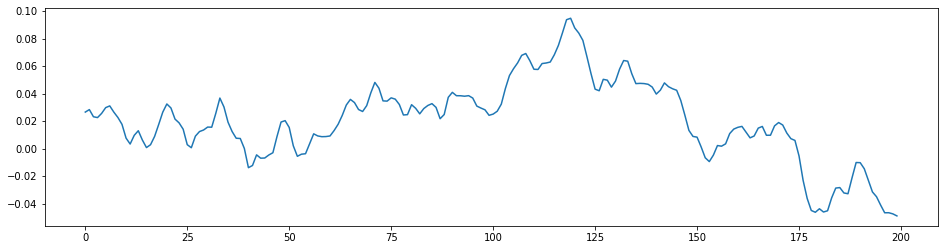

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(audio_data[400:600])
plt.show()

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "
/usr/local/lib/python3.7/dist-packages/librosa/display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


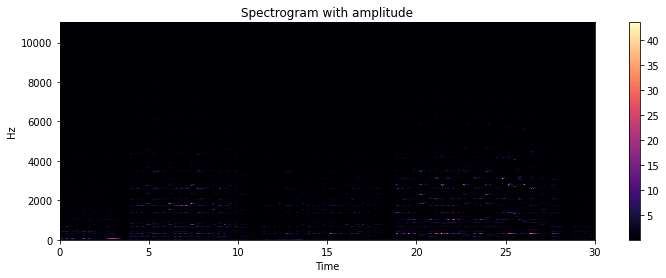

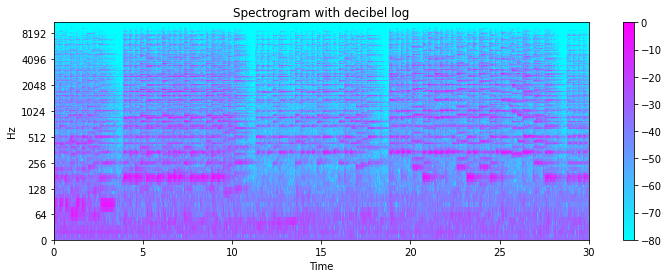

In [ ]:
n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

##Data Pre-processing

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,:-1])

In [6]:
le = LabelEncoder()
y = le.fit_transform(df.iloc[:,-1])

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


##Model Training 

###Random Forest Classifier

In [ ]:
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
res = model1.predict(X_test)

In [ ]:
accuracy_score(y_test,res)

0.7377377377377378

In [ ]:
model1.predict_proba(X_test)

array([[0.04, 0.  , 0.  , ..., 0.67, 0.03, 0.04],
       [0.24, 0.17, 0.11, ..., 0.04, 0.04, 0.1 ],
       [0.05, 0.01, 0.05, ..., 0.06, 0.  , 0.08],
       ...,
       [0.03, 0.  , 0.01, ..., 0.56, 0.02, 0.  ],
       [0.  , 0.93, 0.  , ..., 0.  , 0.01, 0.01],
       [0.07, 0.  , 0.2 , ..., 0.1 , 0.08, 0.1 ]])

In [ ]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.86      0.72      0.79       219
           1       0.84      0.91      0.87       190
           2       0.71      0.66      0.68       208
           3       0.68      0.79      0.73       200
           4       0.86      0.76      0.81       211
           5       0.82      0.88      0.85       201
           6       0.78      0.84      0.81       200
           7       0.73      0.75      0.74       208
           8       0.77      0.81      0.79       190
           9       0.65      0.57      0.61       171

    accuracy                           0.77      1998
   macro avg       0.77      0.77      0.77      1998
weighted avg       0.77      0.77      0.77      1998



Given Data Set

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train2,y_train2)
y_pred2=rfc.predict(X_test2)
accuracy_score(y_test2,y_pred2)

0.8663663663663663

###Logistic Regressor

In [ ]:
model2 = LogisticRegression(max_iter=100000)
model2.fit(X_train,y_train)
res = model2.predict(X_test)

In [ ]:
accuracy_score(y_test,res)

0.6171171171171171

In [ ]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.59      0.48      0.53       219
           1       0.84      0.91      0.87       190
           2       0.50      0.55      0.53       208
           3       0.55      0.55      0.55       200
           4       0.69      0.59      0.64       211
           5       0.70      0.67      0.68       201
           6       0.70      0.78      0.74       200
           7       0.62      0.68      0.65       208
           8       0.56      0.58      0.57       190
           9       0.39      0.39      0.39       171

    accuracy                           0.62      1998
   macro avg       0.61      0.62      0.61      1998
weighted avg       0.62      0.62      0.62      1998



Given Data Set

In [ ]:
lrc = LogisticRegression(max_iter=100000)
lrc.fit(X_train2,y_train2)
y_pred2=lrc.predict(X_test2)
accuracy_score(y_test2,y_pred2)

0.7317317317317318

###XGBoost Classifier

In [ ]:
model3 = XGBClassifier(max_iter=100000)
model3.fit(X_train,y_train)
res3 = model3.predict(X_test)

In [ ]:
accuracy_score(y_test,res3)

0.7037037037037037

In [ ]:
print(classification_report(y_test,res3))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72       219
           1       0.84      0.91      0.87       190
           2       0.63      0.67      0.65       208
           3       0.65      0.70      0.68       200
           4       0.80      0.74      0.77       211
           5       0.74      0.83      0.78       201
           6       0.77      0.85      0.81       200
           7       0.70      0.69      0.69       208
           8       0.77      0.75      0.76       190
           9       0.63      0.58      0.61       171

    accuracy                           0.74      1998
   macro avg       0.74      0.74      0.73      1998
weighted avg       0.74      0.74      0.73      1998



Given Data

In [ ]:
xgb = XGBClassifier(max_iter=100000)
xgb.fit(X_train2,y_train2)
y_pred2=xgb.predict(X_test2)
accuracy_score(y_test2,y_pred2)

0.7917917917917918

###Light GBM Classifier

In [ ]:
import lightgbm as lgb
model4 = lgb.LGBMClassifier(max_depth=3,num_leaves=9)
model4.fit(X_train,y_train)
res4 = model4.predict(X_test)

In [ ]:
accuracy_score(y_test,res4)

0.7267267267267268

In [ ]:
res4

array([7, 0, 6, ..., 7, 1, 3])

In [ ]:
lgbm = lgb.LGBMClassifier(max_depth=3,num_leaves=9)
lgbm.fit(X_train2,y_train2)
y_pred2=lgbm.predict(X_test2)
accuracy_score(y_test2,y_pred2)

0.7947947947947948

###Support Vector Classifier

In [ ]:
model5 = SVC(probability = True)
model5.fit(X_train,y_train)
res5 = model5.predict(X_test)

In [ ]:
accuracy_score(y_test,res5)

0.7517517517517518

In [ ]:
model5.predict_proba(X_test)

In [ ]:
print(classification_report(y_test,res5))

Given Data

In [ ]:
svc = SVC(probability=True)
svc.fit(X_train2,y_train2)
y_pred2=svc.predict(X_test2)
accuracy_score(y_test2,y_pred2)

0.8593593593593594

###Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
res = model.predict(X_test)

In [ ]:
accuracy_score(y_test,res)

In [ ]:
print(classification_report(y_test,res))

Given Data

In [ ]:
dtr = DecisionTreeClassifier()
dtr.fit(X_train2,y_train2)
y_pred2=dtr.predict(X_test2)
accuracy_score(y_test2,y_pred2)

### NN

###Model 1 

In [9]:
model_1nn = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(10, activation='softmax'),
])

print(model_1nn.summary())
model_1nn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history_1nn = model_1nn.fit(X_train, y_train, epochs=50, batch_size=72, 
                  validation_data = [X_test,y_test],shuffle=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               14848     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history_1nn.history['acc'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Training Accuracy'))
fig.add_trace(go.Scatter(y=history_1nn.history['val_acc'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Testing Accuracy'))
fig.update_layout(title='Average High and Low Temperatures in New York',
                   xaxis_title='Month',
                   yaxis_title='Temperature (degrees F)')
fig.show()

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history_1nn.history['loss'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Training Loss'))
fig.add_trace(go.Scatter(y=history_1nn.history['val_loss'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Validation Loss'))
fig.update_layout(title='Validation and Training Loss',
                   xaxis_title='loss',
                   yaxis_title='epochs')
fig.show()

###Model 2

In [12]:
model_2nn = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(10, activation='softmax'),
])

print(model_2nn.summary())
model_2nn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history_2nn = model_2nn.fit(X_train, y_train, epochs=50, batch_size=72, 
                  validation_data = [X_test,y_test],shuffle=False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               29696     
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)               

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history_2nn.history['acc'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Training Accuracy'))
fig.add_trace(go.Scatter(y=history_2nn.history['val_acc'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Validation Accuracy'))
fig.update_layout(title='Validation and Training Accuracies',
                   xaxis_title='epochs',
                   yaxis_title='Accuracy')
fig.show()

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history_2nn.history['loss'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Training Loss'))
fig.add_trace(go.Scatter(y=history_2nn.history['val_loss'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Validation Loss'))
fig.update_layout(title='Validation and Training Loss',
                   xaxis_title='loss',
                   yaxis_title='epochs')
fig.show()

###Model 3

In [16]:
model_3nn = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),

    k.layers.Dense(256, activation='relu'),

    k.layers.Dense(128, activation='relu'),

    k.layers.Dense(64, activation='relu'),

    k.layers.Dense(10, activation='softmax'),
])

print(model_3nn.summary())
model_3nn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history_3nn = model_3nn.fit(X_train, y_train, epochs=50, batch_size=72, 
                  validation_data = [X_test,y_test],shuffle=False)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               29696     
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 202,826
Trainable params: 202,826
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
111/111 [=======================

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history_3nn.history['acc'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Training Accuracy'))
fig.add_trace(go.Scatter(y=history_3nn.history['val_acc'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Validation Accuracy'))
fig.update_layout(title='Validation and Training Accuracies',
                   xaxis_title='epochs',
                   yaxis_title='Accuracy')
fig.show()

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history_3nn.history['loss'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Training Loss'))
fig.add_trace(go.Scatter(y=history_3nn.history['val_loss'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Validation Loss'))
fig.update_layout(title='Validation and Training Loss',
                   xaxis_title='loss',
                   yaxis_title='epochs')
fig.show()

###Model 4

In [19]:
model_4nn = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(10, activation='softmax'),
])

print(model_4nn.summary())
model_4nn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history_4nn = model_4nn.fit(X_train, y_train, epochs=150, batch_size=72, 
                  validation_data = [X_test,y_test],shuffle=False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              59392     
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)              

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history_4nn.history['acc'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Training Accuracy'))
fig.add_trace(go.Scatter(y=history_4nn.history['val_acc'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Validation Accuracy'))
fig.update_layout(title='Validation and Training Accuracies',
                   xaxis_title='epochs',
                   yaxis_title='Accuracy')
fig.show()

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history_4nn.history['loss'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Training Loss'))
fig.add_trace(go.Scatter(y=history_4nn.history['val_loss'], x=[i for i in range(0,50)],
                    mode='lines',
                    name='Validation Loss'))
fig.update_layout(title='Validation and Training Loss',
                   xaxis_title='loss',
                   yaxis_title='epochs')
fig.show()

## Ensemble Models

In [ ]:
class ensemble():
  def __init__(self,model1,model2,model3,model4):
    self.model1 = model1
    self.model2 = model2
    self.model3 = model3
    self.model4 = model4
  
  def final(self,y1,y2,y3,y4):
    test_list = np.array([y1,y2,y3,y4])
    # print(test_list)
    res = max([p[0] for p in statistics._counts(test_list)])
    return res

  def predict(self,X):
    y1=list(self.model1.predict(X))
    y2=list(self.model2.predict(X))
    y3=list(self.model3.predict(X))
    y4=list(self.model4.predict(X))
    y = []
    
    for i in range(len(y1)):
      y.append(self.final(y1[i],y2[i],y3[i],y4[i]))
    return y

In [ ]:
class priority_ensemble_classifier():
  def __init__(self,model1,model2,model3,model4,validation_scores):
    self.model1 = model1
    self.model2 = model2
    self.model3 = model3
    self.model4 = model4
    self.validation_scores=validation_scores
  
  def predict(self,X_test):
    self.probs1 = self.model1.predict_proba(X_test)*self.validation_scores[0]
    self.probs2 = self.model2.predict_proba(X_test)*self.validation_scores[1]
    self.probs3 = self.model3.predict_proba(X_test)*self.validation_scores[2]
    self.probs4 = self.model4.predict_proba(X_test)*self.validation_scores[3]
    final_probs = self.probs1+self.probs2+self.probs3+self.probs4
    print(np.shape(final_probs))
    y_pred = [np.argmax(i) for i in final_probs]
    return y_pred

In [ ]:
model_priority = priority_ensemble_classifier(model1,model3,model4,model5,[0.75,0.72,0.72,0.78])
y_pred_priority = model_priority.predict(X_test)
accuracy_score(y_test,y_pred_priority)

(1998, 10)


0.7897897897897898

In [ ]:
model_stacking = ensemble(model1,model3,model4,model5)
y_pred_stacking = model_stacking.predict(X_test)
accuracy_score(y_test,y_pred_stacking)

0.7502502502502503

##Pipeline Creation 

In [ ]:
class pipeline():
  def __init__(self,path):
    self.path = path

  def preprocessing(self,X):
    self.pre = Preprocess(X)
    return 
  def fit(self):
    pre = Preprocess(self.path)
    X_train = pre[:,:-1]
    y_train = pre[:,-1]
    self.model = k.models.Sequential([
        k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
        k.layers.Dropout(0.3),
        
        k.layers.Dense(512, activation='relu'),
        k.layers.Dropout(0.3),

        k.layers.Dense(256, activation='relu'),
        k.layers.Dropout(0.3),

        k.layers.Dense(128, activation='relu'),
        k.layers.Dropout(0.3),

        k.layers.Dense(64, activation='relu'),
        k.layers.Dropout(0.3),

        k.layers.Dense(10, activation='softmax'),
    ])
    self.model_4nn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
    history_4nn = model_4nn.fit(X_train,y_train, epochs=150, batch_size=72, 
                  shuffle=False)
    return
  def evaluate(self,X,y):
    self.preprocess()
    res = np.argmax(self.model.predict(X))
    return accuracy_score(res)



## Model Saving

In [ ]:
joblib.dump(model_4nn, 'model.pkl')
model_load = joblib.load('model.pkl')
model_load.evaluate(X_test,y_test,batch_size=72)

INFO:tensorflow:Assets written to: ram://23f4e573-a02d-4fdc-a40a-224a02686a04/assets
28/28 [==============================] - 0s 6ms/step - loss: 0.9448 - acc: 0.8534


[0.9448199272155762, 0.8533533811569214]

In [ ]:
joblib.dump(model5, 'model.pkl')
model_load = joblib.load('model.pkl')

## Unused Functions/Cells

In [ ]:
def dict_extract_to_df(dataframe):
  col = ['chroma_stft', 'rms', 'spectral_centroid','spectral_bandwidth', 'spectral_rolloff', 'zero_crossing_rate','harmon', 'plp']
  X = []
  for i in col:
    mean = []
    var = []
    for j in dataframe[i]:
      mean.append(np.mean(j))
      var.append(np.var(j)) 
    X.append(mean)
    X.append(var)
  l = []
  for i in dataframe['tempo']:
    l.append(i[0])
  X.append(l)
  X = np.array(X)
  mfc = []
  for m in range(0,20):
    mean = []
    var = []
    for i in dataframe['mfcc']:
        var.append(np.var(i[m]))
        mean.append(np.mean(i[m]))
    mfc.append(mean)
    mfc.append(var)
  mfc = np.array(mfc)
  X = np.concatenate([X.T,mfc.T],axis = 1)
  dfcol = ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
        'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
        'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
        'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
        'harmony_mean', 'harmony_var', 'plp_mean', 'plp_var', 'tempo','mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
        'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
        'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
        'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
        'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
        'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
        'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
        'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']
  df = pd.DataFrame(X,columns = dfcol)
  return df